In [2]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Final Project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Final Project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Final Project/venv/bin/python -m pip install --upgrade pip' command.


In [12]:
import os

import pickle
import json

from pathlib import Path
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.manifold import *

from sklearn.pipeline import Pipeline

plt.style.use("ggplot")

In [2]:
with open("data/ml_project_dataset.pkl", "rb") as pkl:
    data = pickle.load(pkl)
cleaned = data.copy()
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     2605 non-null   int64 
 1   Gender  2605 non-null   object
 2   Status  2605 non-null   object
 3   f1      2605 non-null   object
 4   f2      2605 non-null   object
 5   f3      2605 non-null   object
 6   f4      2605 non-null   object
 7   f5      2605 non-null   object
dtypes: int64(1), object(7)
memory usage: 162.9+ KB
None


,Age,Gender,Status,f1,f2,f3,f4,f5
0,28,Female,Happy,"[-0.03723609, -0.020824267, -0.025246128, 0.00...","[-0.0013615170028060675, -0.000550377124454826...","[-0.045345112681388855, 0.049214184284210205, ...","[0.622996985912323, 0.5587776899337769, 0.2035...","[142.0, 268.0, -91.8211441040039, 147.0, 304.0..."
1,24,Male,Sad,"[-0.009315872, -0.0008500488, 0.0008058883, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.22100389003753662, 0.0, 0.0, 0.070420034229...","[1302.0, 2091.0, -218.44000244140625, 928.0, 2..."
2,29,M,neutral,"[-0.013662366, 0.03466877, -0.065040134, -0.04...","[-0.008576362393796444, 0.09807106107473373, -...","[-0.002319525694474578, 0.03656185418367386, -...","[0.0, 0.21522775292396545, 0.26262786984443665...","[831.0, 252.0, -65.05692291259766, 909.0, 516...."
3,28,M,happy,"[-0.06278418, -0.03465886, -0.035757925, -0.02...","[0.03950166329741478, 0.1211700439453125, 0.03...","[-0.02030731551349163, 0.0438639298081398, -0....","[0.021185416728258133, 0.015900805592536926, 0...","[796.0, 715.0, -420.5904541015625, 850.0, 845...."
4,25,Male,Normal,"[0.027600960806012154, 0.03169381991028786, -0...","[-0.012523038312792778, 0.1949128955602646, 0....","[-0.024486687034368515, 0.031889624893665314, ...","[0.36306896805763245, 0.45892614126205444, 0.1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...
2600,21,Female,Neutral,"[-0.08245806396007538, 0.004096889868378639, 0...","[-0.00660118879750371, 0.016428500413894653, 0...","[-0.040763456374406815, 0.0548965260386467, -0...","[0.2818586230278015, 0.0, 0.1590728461742401, ...","[189.0, 377.0, -213.5455780029297, 211.0, 463...."
2601,24,Female,Happy,"[-0.024614291, 0.0066937124, 0.030145485, -0.0...","[0.0009541047620587051, 0.1416327953338623, 0....","[-0.06006622314453125, 0.045196782797575, -0.1...","[0.0, 0.04338845983147621, 0.01060467213392257...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2602,12,Female,Happy,"[-0.03445599973201752, -0.0030360377859324217,...","[-0.011861197650432587, 0.28009411692619324, 0...","[-0.035674870014190674, 0.06552769988775253, -...","[0.5378477573394775, 0.0, 0.39331185817718506,...","[154.0, 310.0, -205.8900146484375, 154.0, 354...."
2603,25,male,happy,"[-0.02918069, 0.032438118, 0.012860616, -0.045...","[0.018076958134770393, 0.13615529239177704, 0....","[-0.04480195418000221, 0.06002373620867729, -0...","[0.0, 0.25327205657958984, 0.14244912564754486...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


### Fixing Bad Status

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(f"Unique status:\n{data['Status'].value_counts()}\n")

Unique status:
sad            473
happy          451
neutral        403
Sad            350
Happy          350
Neutral        205
Normal         145
natural         68
N               30
H               25
S               25
happy           20
0d02ffb6f14      1
77ae9e7a42       1
77ae9e7a41       1
610e0ee7bf       1
77ae9e7a52       1
77ae9e7a50       1
0051a40fde       1
0d02ffb6f6       1
611e0ee7bf       1
0d02ffb6f2       1
0040a40fde       1
77ae9e7a44       1
77ae9e7a40       1
77ae9e7a48       1
77ae9e7a46       1
0049a40fde       1
0d02ffb6f1       1
600e0ee7bf       1
609e0ee7bf       1
0d02ffb6f12      1
77ae9e7a49       1
0d02ffb6f11      1
602e0ee7bf       1
77ae9e7a38       1
0044a40fde       1
608e0ee7bf       1
606e0ee7bf       1
604e0ee7bf       1
0d02ffb6f5       1
77ae9e7a51       1
0d02ffb6f7       1
607e0ee7bf       1
601e0ee7bf       1
0054a40fde       1
0d02ffb6f3       1
77ae9e7a39       1
0d02ffb6f9       1
77ae9e7a43       1
598e0ee7bf       1
0043a40fde      

In [4]:
cleaned["Status"] = data["Status"].apply(lambda x: x.upper()[0] if type(x) == str  and x.lower()[0] in  list("nhs") else np.nan)

cleaned.dropna(subset = ['Status'], inplace=True)
print(f"Cleaned labels in 'Status' {cleaned['Status'].unique()}")

Cleaned labels in 'Status' ['H' 'S' 'N']


### Fixing bad genders

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(f"Unique status:\n{cleaned['Gender'].unique()}\n")

cleaned["Gender"] = cleaned["Gender"].apply(lambda x: x.upper()[0])
print(f"Cleaned labels in 'Gender' {cleaned['Gender'].unique()}")

Unique status:
['Female' 'Male' 'M' 'female' 'male' 'F' 'm']

Cleaned labels in 'Gender' ['F' 'M']


## Transforming age 

Changing age from decimal range to log range, compactness will probably help the regression task. 

In [6]:
class AgeTransformer:
    def transform(self, X):
        return np.log(X)
    
    def inverse_transform(self, X):
        return np.exp(X)

age_transformer = AgeTransformer()
cleaned["Age"] = age_transformer.transform(data["Age"])

print("Original Data:")
print(data["Age"].describe(), end="\n\n")

print("Cleaned:")
print(cleaned["Age"].describe(), end="\n\n")

Original Data:
count    2605.000000
mean       30.063724
std        14.533602
min         5.000000
25%        22.000000
50%        25.000000
75%        38.000000
max        82.000000
Name: Age, dtype: float64

Cleaned:
count    2545.000000
mean        3.280109
std         0.532218
min         1.609438
25%         3.091042
50%         3.218876
75%         3.637586
max         4.406719
Name: Age, dtype: float64



# Features

Missing values filling
There are several options

1. filling with means of dimensions

2. filling with gaussian samples alongside dimensions

3. filling with means of classes

4. filling with gaussian samples alongside dimensions for each class

5. filling with nearest neighbors (not worth the hassle)


Option 4 is probably the best, 3 will probably lead to overfitting but I've implemented the 2nd option just to see what happens.

In [7]:
keys = [f"f{i}" for i in range(1, 6)]

X = [cleaned[k].values.tolist() for k in keys]



for idx, x in enumerate(X):
    x = np.array(x)
    nans = np.isnan(x).nonzero()
    mean, std = np.nanmean(x, axis=0), np.nanstd(x, axis=0)
    for i, j in zip(*nans):
        x[i, j] = np.random.normal(loc=mean[j],scale=std[j])
    print(x.shape)
    X[idx] = x

X = np.concatenate(X, axis=1)
print(np.isnan(X).sum())

(2545, 512)
(2545, 1536)
(2545, 2304)
(2545, 2560)
(2545, 204)
0


### splitting train and test data

In [8]:
from sklearn.model_selection import train_test_split

portions = {
    "val": 0.1,
    "test": 0.2
}   


indices = np.arange(len(X))

non_splitted_indices, test_indices = train_test_split(indices, test_size=portions["test"],
shuffle=True, random_state=42)

train_indices, val_indices = train_test_split(indices, test_size=portions["val"], shuffle=True)

### dimension reduction on training data

In [9]:
variance_info = []
X_train = X[train_indices]
for n in np.logspace(1, np.log(X.shape[1]), num=50, base=10, dtype=int):
    svd = TruncatedSVD(n_components=n)
    preprocessor = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("svd", svd)
        ]
    )
    preprocessor.fit(X_train)
    explained_variance = svd.explained_variance_ratio_.sum()
    variance_info.append(
        {
            "n_components": n,
            "explained_variance": explained_variance,
            "all_variances": svd.explained_variance_ratio_
        }
    )
    print(f"N Components: {n}, Explained variance: {explained_variance}")
    if explained_variance > 0.95:
        break

N Components: 10, Explained variance: 0.5002240367681553
N Components: 14, Explained variance: 0.5614945464200236
N Components: 20, Explained variance: 0.6137348994159096
N Components: 30, Explained variance: 0.6710965740825745
N Components: 43, Explained variance: 0.7191751057385503
N Components: 63, Explained variance: 0.7682744116104663
N Components: 91, Explained variance: 0.8136738162828686
N Components: 133, Explained variance: 0.855764528096008
N Components: 192, Explained variance: 0.8886589557798995
N Components: 278, Explained variance: 0.9171218782108227
N Components: 403, Explained variance: 0.9471906314328409
N Components: 584, Explained variance: 0.9725249176558672
(2290, 584)


The place where were the difference becomes increasingly small after, and itself has a small variance is a good place to choose as the right **n_components** 

Text(0.5, 0, 'N Components')

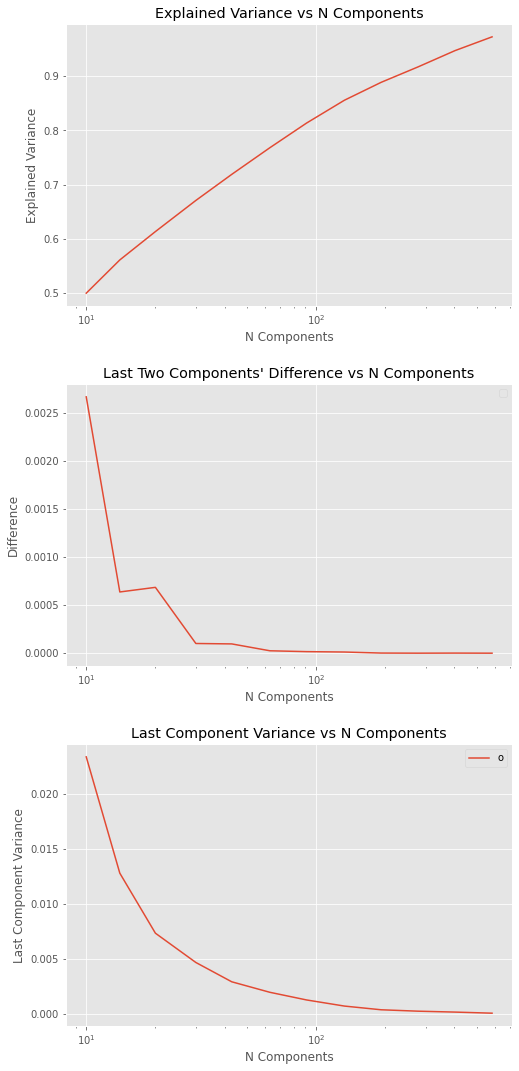

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(8,15), constrained_layout=True,
                        #  gridspec_kw=dict(
                        #      hspace=0.2,
                        #      left=0.1,
                        #      right=0.9,
                        #      top=0.9,
                        #      bottom=0.1)
                         )
fig.set_constrained_layout_pads(w_pad=0.5, h_pad=0.2, hspace=0, wspace=0.5)

axes = list(axes.flat)
[ax.set_xscale("log") for ax in axes]

variance_df = pd.DataFrame(variance_info)


# Plotting explained variance
ax = axes[0]
variance_df.plot("n_components", "explained_variance", ax=ax, legend=False)
ax.set_title("Explained Variance vs N Components")
ax.grid("on")
ax.set_ylabel("Explained Variance")
ax.set_xlabel("N Components")


# Plotting variance differences between last and one before last components
ax = axes[1]
diff_info = []
for var_info in variance_info:
    before_last, last = var_info["all_variances"][-2:]
    diff_info.append(
        {
            "difference": before_last - last,
            "n_components": var_info["n_components"],
            "last_var": last,
        }
    )

diff_info = pd.DataFrame(diff_info)

diff_info.plot("n_components", "difference", ax = ax, legend=False)
ax.legend("")
ax.grid("on")
ax.set_title("Last Two Components' Difference vs N Components")
ax.set_ylabel("Difference")
ax.set_xlabel("N Components")



# Plotting variance differences between last and one before last components
ax = axes[2]
diff_info.plot("n_components", "last_var", ax = ax, legend=False)
ax.legend("off")
ax.grid("on")
ax.set_title("Last Component Variance vs N Components")
ax.set_ylabel("Last Component Variance")
ax.set_xlabel("N Components")


In [18]:
n = 20

preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("svd", svd)
    ]
)
preprocessor.fit(X[train_indices])

# Applying dimension reduction on all data
X_transform = preprocessor.fit_transform(X)

### Saving the preprocessed data for further use

preprocessed data + (train, test, val) indices as metadata in a different json file.

In [22]:
final_df = cleaned.copy()

final_df["features"] = X_transform.tolist()
final_df.drop(
    labels = "f1 f2 f3 f4 f5".split(), axis=1, inplace=True
)

In [25]:
save_loc = "data/processed/"
Path(save_loc).mkdir(parents=True, exist_ok=True)

final_df.to_csv("data/processed/preprocessed_data.csv.gz")

with open(os.path.join(save_loc, "set_indices.json"), "w") as jfile:
    json.dump(
        {
            "train_indices": train_indices.tolist(),
            "val_indices": val_indices.tolist(),
            "test_indices": test_indices.tolist()
        }, jfile
    )